<a href="https://colab.research.google.com/github/Anjanachenchani/Analog-clock/blob/main/exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns: ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']


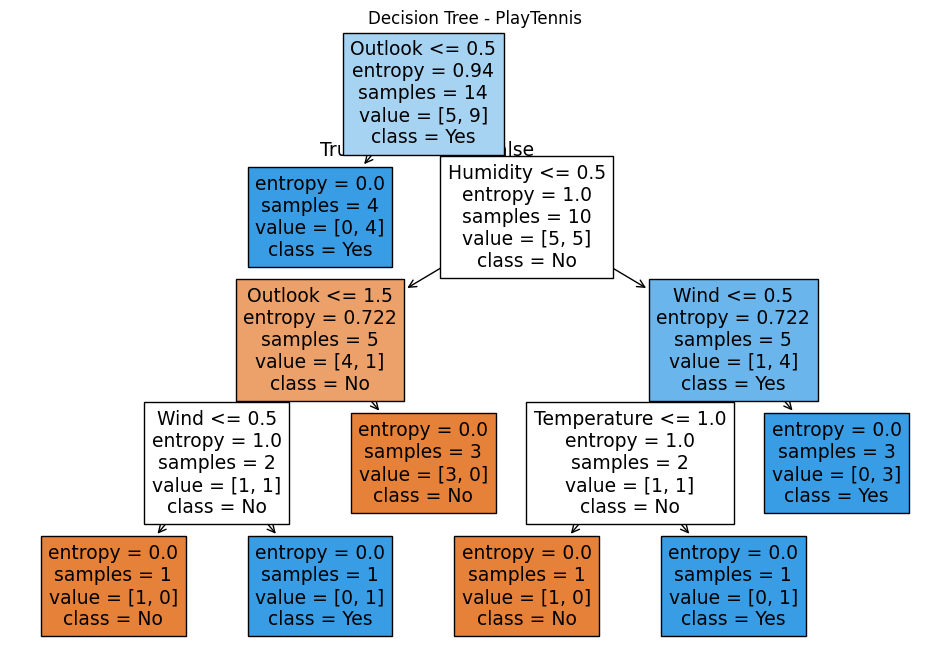

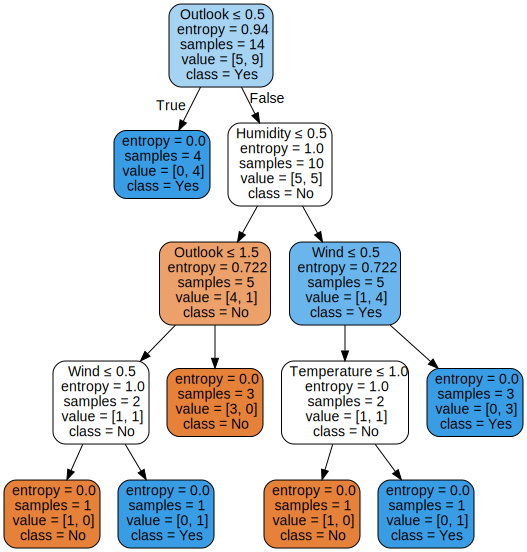

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

# Load the dataset
PlayTennis = pd.read_csv("/content/PlayTennis.csv")

# Print the column names to verify (optional)
print("Columns:", PlayTennis.columns.tolist())

# Encoding categorical variables using LabelEncoder
# Encoding categorical variables using LabelEncoder
Le = LabelEncoder()

PlayTennis['Outlook'] = Le.fit_transform(PlayTennis['Outlook'])
PlayTennis['Temperature'] = Le.fit_transform(PlayTennis['Temperature'])
PlayTennis['Humidity'] = Le.fit_transform(PlayTennis['Humidity'])
PlayTennis['Wind'] = Le.fit_transform(PlayTennis['Wind'])  # Changed 'Windy' to 'windy'
PlayTennis['PlayTennis'] = Le.fit_transform(PlayTennis['PlayTennis'])     # Make sure case matches

# Features and target
X = PlayTennis.drop(['PlayTennis'], axis=1)
y = PlayTennis['PlayTennis']

# Train Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Plotting the tree using matplotlib
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree - PlayTennis")
plt.show()

# Optional: Visualizing with Graphviz
dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph
